In [1]:
import os
import cv2 as cv
import glob as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model, layers, Sequential, optimizers
from tensorflow import keras

In [2]:
train_dir='D:\\project\\New Plant Diseases Dataset(Augmented)\\train'
valid_dir='D:\\project\\New Plant Diseases Dataset(Augmented)\\valid'
test_dir='D:\\project\\New Plant Diseases Dataset(Augmented)\\test'

In [3]:
Size=224
X_test=[]
y_test=[]

In [4]:
import tensorflow as tf
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    rescale=1/255.0,
).flow_from_directory(train_dir,batch_size=16,target_size=(Size,Size),subset="training",shuffle=True)

Found 70295 images belonging to 38 classes.


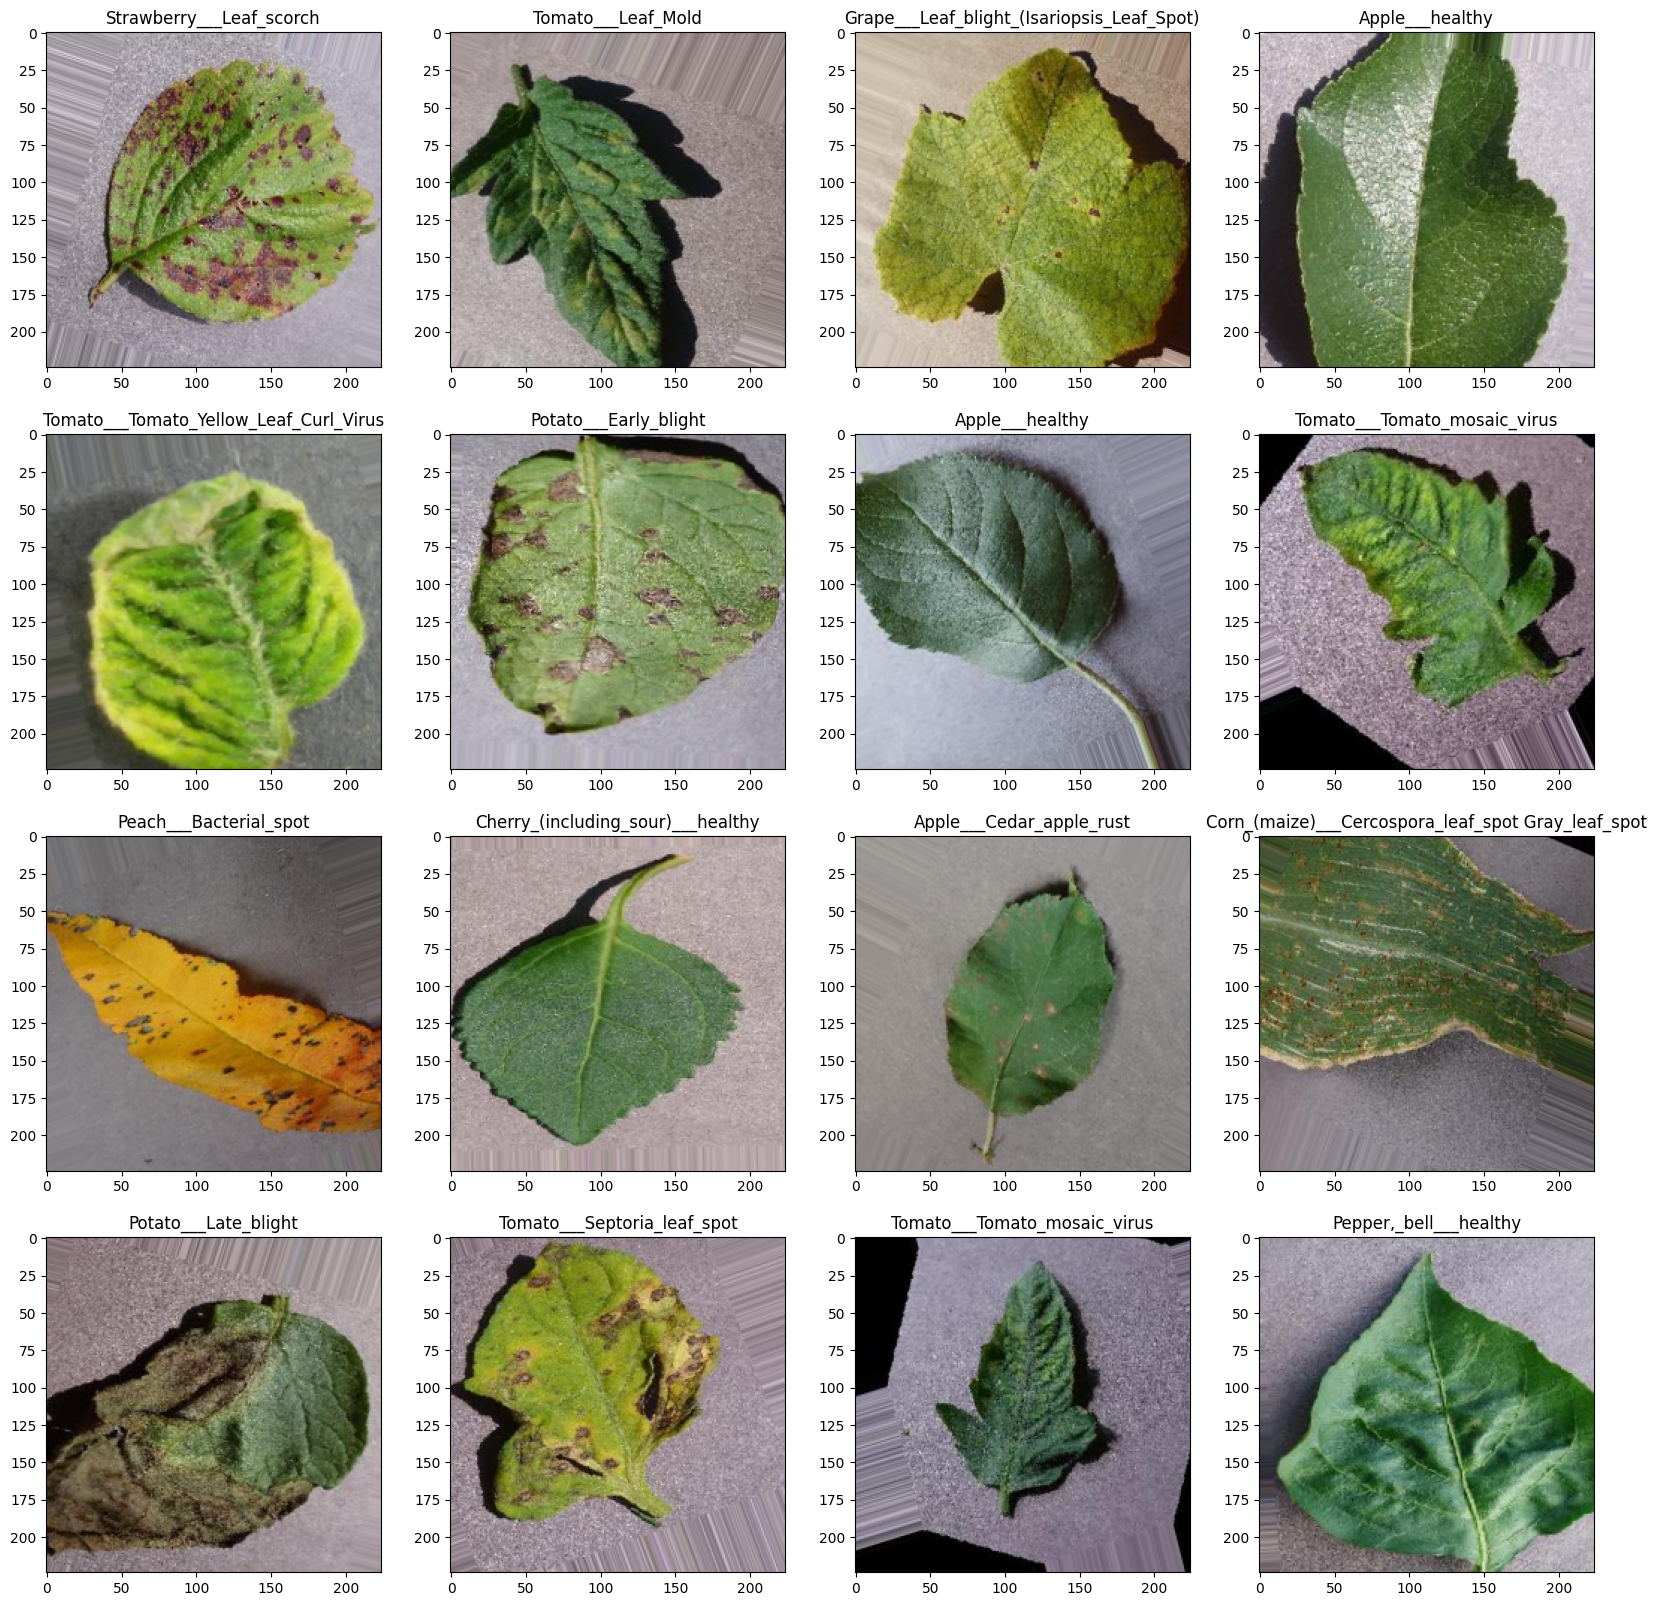

In [5]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [6]:
print(classes)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [7]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
).flow_from_directory(valid_dir,batch_size=16,target_size=(Size,Size),shuffle=False)

Found 17572 images belonging to 38 classes.


In [8]:
X_test=[]
for folder in os.listdir(test_dir):
    files=gb.glob(test_dir+'/*.JPG')
    for file in files :
        img=cv.imread(file)
        X_test.append(cv.resize(img,(Size,Size)))

In [9]:
X_test=np.array(X_test)
print(X_test.shape)

(1089, 224, 224, 3)


In [10]:
X_test=X_test/255.0

In [11]:
import keras
from keras.layers import Flatten , Dense , Dropout , BatchNormalization , MaxPooling2D ,Conv2D
from keras.models import Sequential

In [12]:
vgg16 = tf.keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(Size,Size,3)
)
vgg16.trainable = False

In [13]:
# Define the layers
inputs = keras.Input(shape=(Size,Size,3))

# Get the layer
x = vgg16(inputs, training = False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, activation="relu")(x)
x = tf.keras.layers.Dense(4096, activation="relu")(x)

x = tf.keras.layers.Dense(38, activation="softmax")(x)

VGG16 = Model(inputs=inputs, outputs=x)

In [14]:
VGG16.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
history=VGG16.fit(train_generator,validation_data=valid_generator,epochs=10,batch_size=32,
                  steps_per_epoch=len(train_generator)//16,validation_steps=len(valid_generator)//16,
                   verbose=1)

Epoch 1/10
274/274 [==============================] - 180s 631ms/step - loss: 2.5663 - accuracy: 0.4003 - val_loss: 1.2585 - val_accuracy: 0.5919
Epoch 2/10
274/274 [==============================] - 171s 623ms/step - loss: 1.0537 - accuracy: 0.6576 - val_loss: 1.2711 - val_accuracy: 0.5689
Epoch 3/10
274/274 [==============================] - 175s 638ms/step - loss: 0.8757 - accuracy: 0.7092 - val_loss: 2.0809 - val_accuracy: 0.4789
Epoch 4/10
274/274 [==============================] - 160s 584ms/step - loss: 0.7923 - accuracy: 0.7443 - val_loss: 1.0309 - val_accuracy: 0.6691
Epoch 5/10
274/274 [==============================] - 159s 580ms/step - loss: 0.6994 - accuracy: 0.7648 - val_loss: 0.4130 - val_accuracy: 0.8649
Epoch 6/10
274/274 [==============================] - 142s 517ms/step - loss: 0.6966 - accuracy: 0.7785 - val_loss: 0.4452 - val_accuracy: 0.8438
Epoch 7/10
274/274 [==============================] - 141s 514ms/step - loss: 0.6442 - accuracy: 0.7908 - val_loss: 0.4103 -

In [16]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
ModelLoss, ModelAccuracy = VGG16.evaluate(valid_generator)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

1099/1099 [==============================] - 199s 181ms/step - loss: 0.4510 - accuracy: 0.8487
Test Loss is 0.4509744346141815
Test Accuracy is 0.8486797213554382


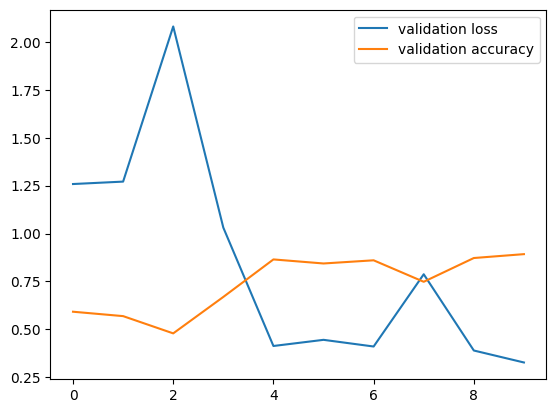

In [18]:
plt.plot(history.history['val_loss'],label='validation loss')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend()